# Faktor Apakah yang Menjual Sebuah Mobil?

Sebagai seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Perusahaan setiap hari. Tim kami perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

**Goals**

Dalam project ini kita akan befokus pada Exploratory Data Analysis dan Data Visualization yang akan dapat membantu kita dalam mengidentifikasi outlier dalam data, menemukan pola dalam data, dan memberikan *insight* baru. Visualisasi data juga membantu menyampaikan cerita dengan menggambarkan data ke dalam bentuk visual yang lebih mudah dipahami, dan menyoroti tren.

Studi ini untuk menjawab 5 hipostesis :
<br>1. Apakah terdapat korelasi antara harga dengan usia kendaraan
<br>2. Apakah terdapat korelasi antara harga dengan jarak tempuh kendaraan
<br>3. Apakah terdapat korelasi antara harga dengan kondisi kendaraan
<br>4. Apakah terdapat korelasi antara harga dengan warna kendaraan
<br>5. Apakah terdapat korelasi antara harga dengan tipe transmisi kendaraan

## Inisialisasi

Kita akan memulai dengan memuat beberapa library yang akan dibutuhkan pada project ini seperti `pandas`, `numpy`, dan `matplotlib`.

In [1]:
# Muat semua library yang kita butuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

### Memuat Data

Memuat informasi dari dateset dan mamuat beberapa baris dari dataset untuk mendapatkan informasi dari data

In [2]:
# Memuat file data menjadi DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut:
- `price` — harga kendaraan
- `model_year` — tahun pembuatan/keluaran mobil
- `model` — merk dan seri mobil
- `condition` — kondisi mobil
- `cylinders` — jumlah blok mesin
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan
- `transmission` — tipe perpindahan kecepatan/power
- `paint_color` — warna cat eksterior mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda 
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [3]:
# menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Dari data diatas kita dapat melihat dalam dataset terdapat 51525 baris dan 13 kolom, kita juga dapat mengetahui beberapa kolom dalam dateset kita terdapat valui yang hilang di sana, seperti pada kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd`. 

In [4]:
# menampilkan sampel data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Setelah kita melihat sampel dari data kita mendapat gambaran pada kolom `type` pada value `SUV` ditulis dengan huruf kapital, apakah karena itu merupakan singkatan, sepertinya tidak melihat value lainnya ditulis dengan huruf kecil.

In [5]:
# Checking type of data
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Dari deskripsi data di atas bisa kita dapatkan beberapa kolom dengan tipe data yang tidak seharusnya seperti `model_year`, `cylinders`, dan `odometer` seharusnya `integer`. Kolom `is_4wd` bisa kita deskripsikan dengan angka `1` untuk yes dan `0` untuk no, atau dengan `true` or `false`.

In [6]:
# Memeriksa distribusi kolom dengan 'missing_value'
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Kita dapat melihat pada kolom `is_4wd` missing value terjadi pada separuh data.

In [7]:
# Memeriksa distribusi kolom 'is_4wd'
df['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

Jika kita asumsikan nilai `1.0` sudah memuat semua mobil dengan penggerak 4WD apakah semua nilai pada `NaN` sudah tidak memuat mobil 4WD dan hanya memuat mobil 2WD atau lainnya. Jika seperti itu kita hanya perlu mengganti menjadi `0` atau no.

In [8]:
# Memeriksa distribusi kolom 'cylinders'
df['cylinders'].value_counts(dropna=False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

Apakah mungkin untuk kita dapat mengisi value yang hilang pada `cylinders` atau cukup bagi kita menggantinya dengan `unknown`.

In [9]:
# Memeriksa distribusi kolom 'paint_color'
df['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Sepertinya tidak mungkin bagi kita untuk mengisinya dengan `custom` lebih masuk akal untuk mengisinya dengan `unknown`.

In [10]:
# Memeriksa statistik deskriptif dari data
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Nilai yang hilang terjadi pada beberapa kolom, kolom yang paling banyak terdapat *missing value* adalah `is_4wd` yang memiliki *missing value* setengah dari jumlah barisnya.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Kita belum dapat mengetahui secara pasti penyebab nilai yangh hilang, apakah karena *human error* atau memang tidak memiliki akses data yang cukup dengan kendaraan tersebut megingat beberapa kendaraan memiliki usia yang sangat tua bisa lebih dari seratus tahun.

Kita akan menangani *missing value* dengan metode berikut :
<br>1. Kita akan mengisi `paint_color` dengan `unknown` adalah pilihan yang paling *possible*.
<br>2. Kita akan menggati nilai yang hilang pada `is_4wd` dengan angka `0`.
<br>3. Kita dapat mengisi kolom `cylinders` dengan nilai rata-rata dari `model`.
<br>4. Kita bisa mengganti *missing value* pada kolom `model_year` dengan rata-rata dari `model`.
<br>5. Terakhir kita akan menangani kolom `odometer` dengan mengisi rata-rata berdasarkan `model_year` dan `condition` dengan metode `groupby`.

## Mengatasi Nilai-Nilai yang Hilang

Beberapa kolom yang akan kta perbaiki :
<br>1. Kolom `paint_color`.
<br>2. Kolom `is_4wd`.
<br>3. Kolom `cylinders`.
<br>4. Kolom `model_year`.
<br>5. Kolom `odometer`.

In [11]:
# Memeriksa duplikat
df.duplicated().sum()

0

Tidak ada nilai duplikat

### Mengisi kolom `paint_color`

In [12]:
# Kita akan mengisi missing value di kolom 'paint_color' dengan 'unknown'
df['paint_color'].fillna('unknown', inplace=True)
df['paint_color'].isna().sum()

0

Semua baris telah terisi

In [13]:
# Memeriksa distribusi kolom 'paint_color' 
df_paint_color = df.pivot_table(index='paint_color', values='price', aggfunc= 'count')
df_paint_color

,price
paint_color,
black,7692
blue,4475
brown,1223
custom,1153
green,1396
grey,5037
orange,231
purple,102
red,4421


### Mengisi kolom `is_4wd`

In [14]:
# Kita akan mengisi missing value di kolom 'is_4wd' dengan '0'
df['is_4wd'].fillna(0, inplace=True)
df['is_4wd'].isna().sum()

0

Semua baris telah terisi

In [15]:
# Memeriksa distribusi kolom 'is_4wd' 
df_is_4wd = df.pivot_table(index='is_4wd', values='price', aggfunc= 'count')
df_is_4wd

,price
is_4wd,
0.0,25953
1.0,25572


### Mengisi kolom `cylinders`

In [16]:
# Memriksa distribusi missing valu pada 'cylinders'
df_cylinders_nan = df[df['cylinders'].isna()]
(df_cylinders_nan['model'].value_counts() / df['model'].value_counts()).sort_values(ascending=False)

mercedes-benz benze sprinter 2500    0.170732
nissan murano                        0.140426
subaru impreza                       0.140000
jeep grand cherokee laredo           0.132812
kia soul                             0.131805
                                       ...   
ford f150                            0.073585
nissan rogue                         0.070362
gmc sierra                           0.069588
ford f150 supercrew cab xlt          0.061162
bmw x5                               0.059925
Name: model, Length: 100, dtype: float64

In [17]:
# Memeriksa distribusi 'cylinders' berdasarkan 'model'
df.groupby(['model', 'cylinders'])['cylinders'].count()

model              cylinders
acura tl           4.0            3
                   6.0          208
bmw x5             6.0          200
                   8.0           51
buick enclave      4.0            1
                               ... 
volkswagen jetta   5.0          123
                   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   6.0           30
Name: cylinders, Length: 307, dtype: int64

Sepertinya masuk akal bagi kita untuk mengisi kolom `cylinders` dengan `median` dari `groupby` kolom `model` dan `cylinders`, karena setiap model memiliki `cylinders` yang hampir sama atau tidak memiliki perbedaan yang signifikan.

In [18]:
# Mengisi nilai yang hilang di kolom 'cylinders'
df['cylinders'] = df.groupby(['model'])['cylinders'].transform(lambda x: x.fillna(x.median()))
df['cylinders'].isna().sum()

0

Semua baris telah terisi

In [19]:
# Memerikasa distribusi kolom 'cylinders'
df_cylinders_pivot = df.pivot_table(index='cylinders', values='price', aggfunc= 'count')
df_cylinders_pivot

,price
cylinders,
3.0,34
4.0,15499
5.0,294
6.0,17435
8.0,17712
10.0,549
12.0,2


### Mengisi kolom `model_year`

In [20]:
df.groupby(['model', 'model_year'])['model_year'].count()

model              model_year
acura tl           1999.0         3
                   2001.0         6
                   2002.0         2
                   2003.0        10
                   2004.0        16
                                 ..
volkswagen passat  2014.0        44
                   2015.0        26
                   2016.0        10
                   2017.0        10
                   2018.0         1
Name: model_year, Length: 2226, dtype: int64

Kita akan mengisi *missing value* pada `model_year` dengan median dari tahun keluaran kendaraan tersebut karena kita asumsikan berdasarkan data di atas bahwa suatu model mobil dikerluarkan dalam kurun waktu kurang lebih `5` tahun.

In [21]:
# Mengisi value 'model_year' yang hilang
df['model_year'] = df.groupby(['model'])['model_year'].transform(lambda x: x.fillna(x.median()))
df['model_year'].isna().sum()

0

Semua baris telah terisi

In [22]:
# Memeriksa distribusi
df_model_year = df.pivot_table(index='model_year', values='price', aggfunc= 'count')
df_model_year

,price
model_year,
1908.0,2
1929.0,1
1936.0,1
1948.0,1
1949.0,1
...,...
2015.0,3403
2016.0,2993
2017.0,2437


### Mengisi kolom `odometer`

In [23]:
# Memeriksa nilai 'median' pada 'odometer' berdasarkan 'model_year' dan 'condition'
df.groupby(['model_year', 'condition'])['odometer'].median()

model_year  condition
1908.0      excellent         NaN
            good         169328.0
1929.0      good              NaN
1936.0      excellent     30000.0
1948.0      like new       4000.0
                           ...   
2019.0      excellent     14531.0
            good          20168.5
            like new      12606.0
            new             151.0
            salvage        9621.0
Name: odometer, Length: 278, dtype: float64

In [24]:
# Mengisi value 'model_year' yang hilang
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year', 'condition'])['odometer'].transform('median'))
df['odometer'].isna().sum()

7

Masih terdapat `7` *missing value*, mari kita isi berdasarkan `model_year` saja.

In [25]:
# Mengisi missing value 'odometer' berdasarkan tahun
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df['odometer'].isna().sum()

1

Masih terdapat `1` baris yang belum terisi, mari kita isi dengan nilai terdekat, berdasarkan `model_year`.

In [26]:
df['odometer'] = df.groupby('model_year')['odometer'].apply(lambda x: x.interpolate(method='nearest')).ffill()          
df['odometer'].isna().sum()

0

In [27]:
# Memeriksa nilai 'median' pada 'odometer' berdasarkan setelah diperbaiki
df.groupby(['model_year', 'condition'])['odometer'].median()

model_year  condition
1908.0      excellent    169328.0
            good         169328.0
1929.0      good         119213.0
1936.0      excellent     30000.0
1948.0      like new       4000.0
                           ...   
2019.0      excellent     14531.0
            good          20168.5
            like new      12606.0
            new             151.0
            salvage        9621.0
Name: odometer, Length: 278, dtype: float64

Sudah, tidak ada nilai yang hilang, mari kita memeriksa informasi dataset.

In [28]:
# Menampilkan deskripsi data setelah mengisi missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Semua kolom telah memiliki jumlah yang sama, artinya missing value telah ditangani.

In [29]:
# Mameriksa duplikat sekali lagi
df.duplicated().sum()

0

Tidak ada duplikat ditemukan. 

## Memperbaiki Tipe Data

Setelah kita memiliki data yang lengkap, selanjutnya kita akan memperbaiki tipe data

### Memperbaki kolom `is_4wd`

In [30]:
# Transform float to int
df['is_4wd'] = df['is_4wd'].astype(np.int64)

In [31]:
# Transform int to boolean
df['is_4wd'] = df['is_4wd'].astype(bool)
df['is_4wd'].dtypes

dtype('bool')

Kolom `is_4wd` sudah menjadi `boolean`.

In [32]:
# Memeriksa distribusi kolom 'is_4wd' 
df['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

Kolom `is_4wd` sudah memiliki value yang benar.

### Memperbaki kolom `model_year`

In [33]:
# Transform 'float' to 'int'
df['model_year'] = df['model_year'].astype(np.int64)
df['model_year'].dtypes

dtype('int64')

Kolom `model_year` sudah menjadi `integer`.

### Memperbaki kolom `cylinders`

In [34]:
# Transform 'float' to 'int'
df['cylinders'] = df['cylinders'].astype(np.int64)
df['cylinders'].dtypes

dtype('int64')

### Mengubah kolom `date_posted` menjadi `Timestamp`

In [35]:
# Mengganti tipe ke data ke format timestamp
df['date_posted'] = pd.to_datetime(df.date_posted, format='%Y-%m-%d')
df['date_posted'].dtype

dtype('<M8[ns]')

### Memperbaiki register kolom `type`

In [36]:
# Mengganti value kolom 'type' menjadi lower
df['type'] = df['type'].str.lower()

In [37]:
# Memeriksa distribusi
df_type = df.pivot_table(index='type', values='price', aggfunc= 'count')
df_type

,price
type,
bus,24
convertible,446
coupe,2303
hatchback,1047
mini-van,1161
offroad,214
other,256
pickup,6988
sedan,12154


Register telah diperbaiki.

In [38]:
# Menampilkan deskripsi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

Kita akan menambahkan beberapa kolom :
<br>1. Kolom `dayofweek_posted` untuk mengetahui hari iklan ditayangkan.
<br>2. Kolom `vehicle_age` untuk usia kendaraan saat diposting.
<br>3. Kolom `avg_distance` untuk rata-rata jarak tempuh kendaraan per tahun.
<br>Kita juga akan mengganti value pada kolom `condition` berdasarkan rating.

### Menambahkan kolom `dayofweek_posted`

In [39]:
# Tambahkan nilai datetime pada saat iklan ditayangkan 
df['dayofweek_posted'] = df['date_posted'].dt.weekday
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,False,2019-03-22,9,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1


Kolom `dayofweek_posted` telah ditambahkan.

### Menambahkan kolom `month_posted`

In [40]:
# Tambahkan nilai datetime pada saat iklan ditayangkan 
df['month_posted'] = df['date_posted'].dt.month
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5,6
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,False,2019-03-22,9,4,3
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4


Kolom `month_posted` telah ditambahkan.

### Menambahkan kolom `year_posted`

In [41]:
# Tambahkan nilai datetime pada saat iklan ditayangkan 
df['year_posted'] = df['date_posted'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019


Kolom `year_posted` telah ditambahkan.

### Menambahkan kolom `vehicle_age`

In [42]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['vehicle_age'] = (df['year_posted'] + 1) - df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5,6,2018,8
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3


Kolom `vehicle_age` telah ditambahkan.

### Menambahkan kolom `avg_distance`

In [43]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
df['avg_distance'] = df['odometer'] / df['vehicle_age']
df['avg_distance'] = np.round(df['avg_distance'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5,6,2018,8,18125.0
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0
3,1500,2003,ford f-150,fair,8,gas,193850.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,17,11403.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0


Kolom `avg_distance` telah ditambahkan.

### Mengganti value kolom `condition` menjadi rating

In [44]:
# Checking distribution of 'condition'
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [45]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah
condition_rate = {
    'salvage' : 0, 
    'fair' : 1, 
    'good' : 2, 
    'excellent' : 3, 
    'like new' : 4, 
    'new' : 5
}

In [46]:
# Menerapkan dictionary ke setiap baris
df['condition'] = df['condition'].map(condition_rate)

In [47]:
# Memeriksa distribusi
df_condition = df.pivot_table(index='condition', values='price', aggfunc= 'count')
df_condition

,price
condition,
0,115
1,1607
2,20145
3,24773
4,4742
5,143


Kolom `condition` telah deperbarui.

## Memeriksa Data yang Sudah Bersih

Melihat deskripsi dan menampilkan sampel.

In [48]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  dayofweek_posted  51525 non-null  int64         
 14  month_posted      5152

Beberapa kolom baru telah ditambahkan, tipe data juga telah diperbaiki.

In [49]:
# Menampilkan sampel data
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance
51515,12000,2005,chevrolet silverado 2500hd,2,8,diesel,228000.0,automatic,pickup,silver,True,2018-08-18,52,5,8,2018,14,16286.0
51516,8999,2011,jeep grand cherokee,2,6,gas,131751.0,automatic,suv,white,True,2018-11-01,51,3,11,2018,8,16469.0
51517,11000,2012,dodge charger,3,8,gas,81000.0,automatic,sedan,black,False,2019-04-19,44,4,4,2019,8,10125.0
51518,3750,2005,ford taurus,3,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,4,8,2018,14,7871.0
51519,11750,2015,honda accord,3,4,gas,78155.0,automatic,coupe,unknown,False,2018-11-24,89,5,11,2018,4,19539.0
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,6,14689.0
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,17,10676.0
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,10,12800.0
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,6,23262.0
51524,6300,2014,nissan altima,2,4,gas,94009.0,automatic,sedan,unknown,False,2018-06-05,10,1,6,2018,5,18802.0


## Mempelajari Parameter Inti

Parameternya adalah :

- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

Untuk mempermudah pekerjaan kita akan membuat beberapa fungsi untuk menghindari pengulangan yang tidak diperlukan.

In [50]:
# Menampilkan statistik deskriptif data
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115237.026608,39.55476,3.005434,6.628491,2018.307462,9.513906,14510.826531
std,10040.803015,6.099381,0.712447,1.657457,62209.760424,28.20427,1.997759,3.474134,0.461447,6.112976,8640.397898
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73159.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9800.000000
50%,9000.000000,2011.000000,3.000000,6.000000,114800.000000,33.00000,3.000000,7.000000,2018.000000,9.000000,13308.000000
75%,16839.000000,2014.000000,3.000000,8.000000,151754.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,17733.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


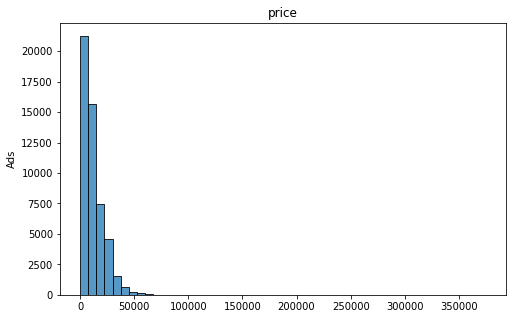

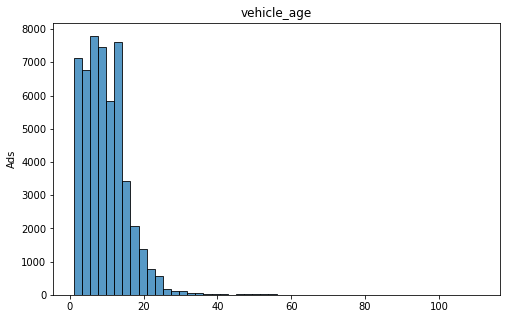

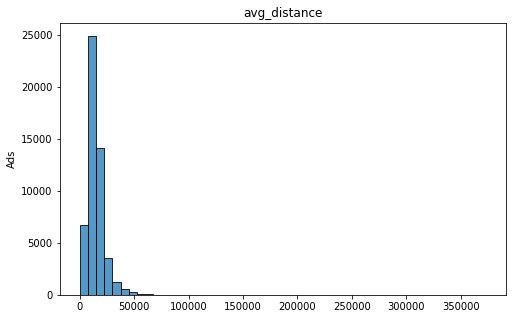

In [51]:
# Membuat histogram
for column in ['price', 'vehicle_age', 'avg_distance']:
    plt.figure(figsize=(8,5))
    sns.histplot(df[column], bins=50, kde=False)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()   

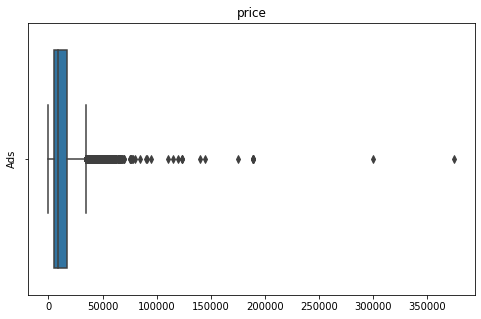

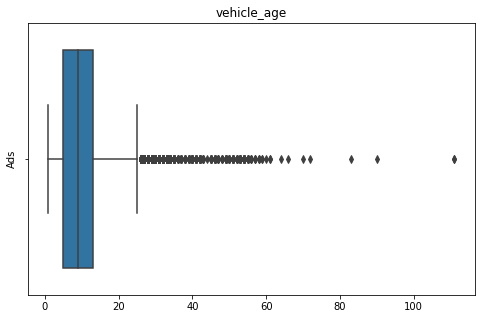

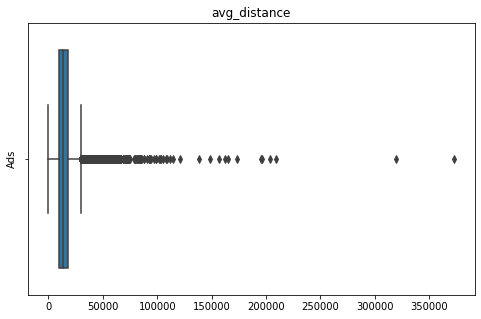

In [52]:
# Menampilkan boxplot
for column in ['price', 'vehicle_age', 'avg_distance']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=column)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()  

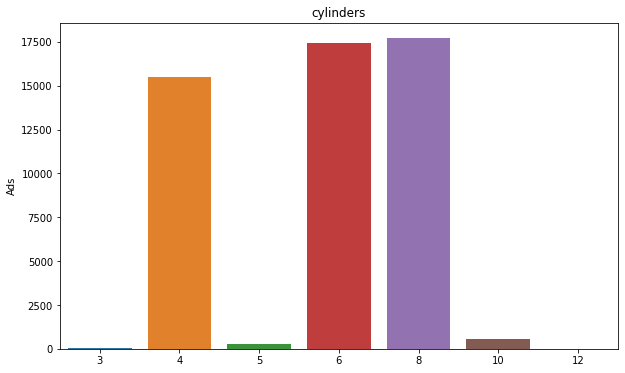

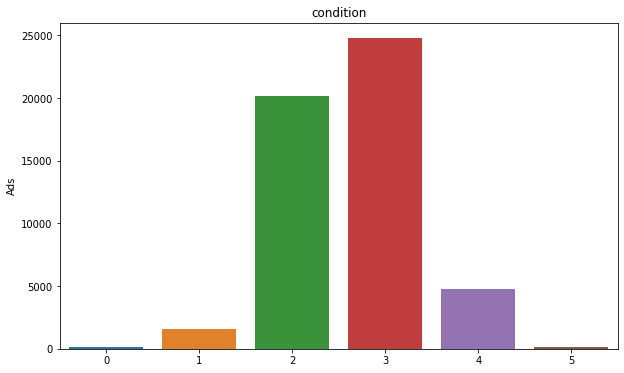

In [53]:
for column in ['cylinders', 'condition']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, data=df)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show()

Gambaran yang bisa diambil :
<br>1. Ada sekitar 75% mobil berada pada harga di bawah \\$16000, beberapa mobil memiliki harga \\$1 yang artinya kita bisa mendapatkan 3 mobil dengan menukar segelas kopi, kita melihat bahwa outlier ada di angka yang lebih dari sekitar \\$30000 dengan jumlah yang sangat besar hingga diatas \\$350000. 
<br>2. Rata-rata usia kendaran adalah 13 tahun, 75% dibawah 17 tahun dan outlier pada usia melebihi 24 tahun, bebrapa mobil berusia sangat tua bahkan ratusan tahun.
<br>3. 75% kendaraan memiliki jarak rata-rata dibawah 17000 miles, dengan rata-rata 13000 miles, sedangkan outlier pada rata-rata jarak ada di angka yang melebihi sekitar 30000 miles, beberapa mobil memiliki jarak rata-rata yang sangat tinggi hingga diatas 350000 miles per tahun.
<br>4. Majority mobil memiliki 4, 6, dan 8 silinder mesin, beberapa mobil memiliki silinder lain daripada itu.
<br>5. Majority mobil memiliki kondisi sangat baik, diikuti dengan kondis bagus, dan seperti baru.

## Mempelajari dan Menangani Outlier

Kita akan menentukan *outiers* dari kolom price, usia, dan odometer.

In [54]:
# Menentukan batas bawah dan batas atas outlier
outlier_columns = ['price', 'vehicle_age', 'avg_distance']

Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR                  

In [55]:
# Menyimpan data tanpa outlier dalam DataFrame yang terpisah
good_df = df[ ~((df[outlier_columns] < lower_bound) | (df[outlier_columns] > upper_bound)).any(axis=1) ]      

In [56]:
# Memfilter data, menghapus harga <$10 dan odometer <1
too_cheap = 10
too_low = 1

good_df = good_df.query('price >= @too_cheap')
good_df = good_df.query('avg_distance >= @too_low')

In [57]:
# Menampilkan informasi dataset tanpa outliers
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46169 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             46169 non-null  int64         
 1   model_year        46169 non-null  int64         
 2   model             46169 non-null  object        
 3   condition         46169 non-null  int64         
 4   cylinders         46169 non-null  int64         
 5   fuel              46169 non-null  object        
 6   odometer          46169 non-null  float64       
 7   transmission      46169 non-null  object        
 8   type              46169 non-null  object        
 9   paint_color       46169 non-null  object        
 10  is_4wd            46169 non-null  bool          
 11  date_posted       46169 non-null  datetime64[ns]
 12  days_listed       46169 non-null  int64         
 13  dayofweek_posted  46169 non-null  int64         
 14  month_posted      4616

Setelah kita menghapus *outliers* baris yang tersisa dari dataset sebesar 46169. 

## Mempelajari Parameter Inti tanpa Outlier

Membuat grafik baru dari kolom yang berisi *outliers* sebelumnya.

In [58]:
# Menampilkan statistik deskriptif dataset tanpa outliers
good_df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance
count,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000
mean,11149.871754,2009.639585,2.616821,6.037926,118347.471063,39.557690,3.003725,6.589855,2018.313479,9.673894,13524.476878
std,7692.646707,5.007516,0.706589,1.628503,58305.124757,28.229571,1.994954,3.482609,0.463912,5.013157,5526.925144
min,10.000000,1994.000000,0.000000,3.000000,5.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,1.000000
25%,5000.000000,2006.000000,2.000000,4.000000,78838.000000,19.000000,1.000000,3.000000,2018.000000,6.000000,9867.000000
50%,8990.000000,2010.000000,3.000000,6.000000,118259.000000,33.000000,3.000000,7.000000,2018.000000,9.000000,13077.000000
75%,15700.000000,2013.000000,3.000000,8.000000,153565.000000,53.000000,5.000000,10.000000,2019.000000,13.000000,16798.000000
max,34595.000000,2019.000000,5.000000,12.000000,527835.000000,271.000000,6.000000,12.000000,2019.000000,25.000000,29625.000000


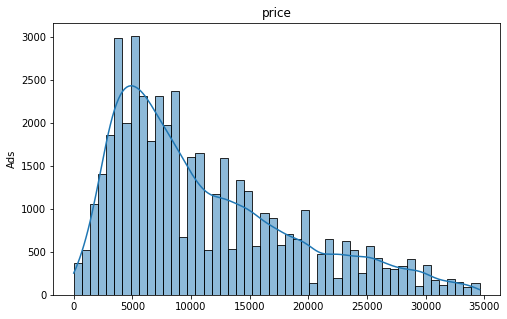

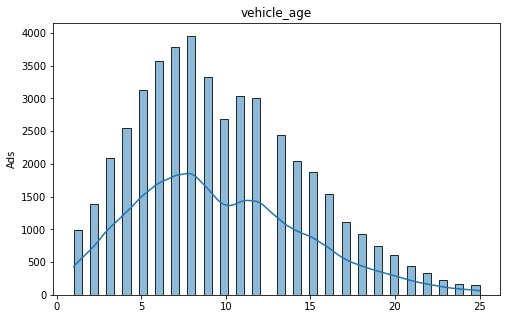

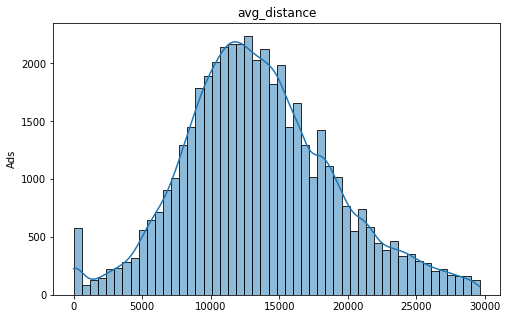

In [59]:
# Membuat fungsi diagram
core_parameter = ['price', 'vehicle_age', 'avg_distance']

for column in core_parameter:
    plt.figure(figsize=(8,5))
    sns.histplot(good_df[column], bins=50, kde=True)
    plt.xlabel('')
    plt.ylabel('Ads')
    plt.title(column)
    plt.show() 

Kita bisa lihat distribusi dari kolom-kolom terlihat lebih baik dari sebelumnya tidak ada nilai yang terlalu jauh.

## Masa Berlaku Iklan

Eksplorasi kolom days_listed untuk mengetahui berapa lama suatu iklan ditayangkan.

### Distribusi days_listed

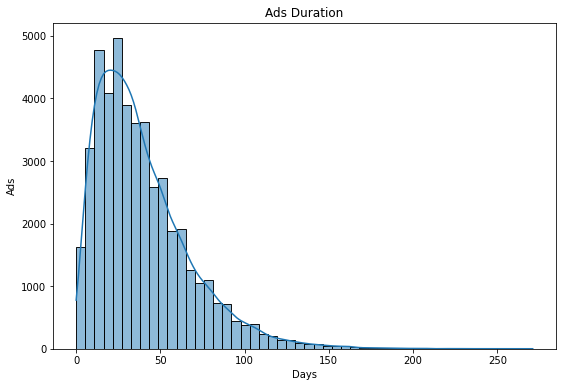

In [60]:
# Menampilkan histogram 'days_listed'
plt.figure(figsize=(9,6))
sns.histplot(good_df['days_listed'], bins=50, kde=True)
plt.xlabel('Days')
plt.ylabel('Ads')
plt.title('Ads Duration')
plt.show()

Umumnya iklan ditayangkan selama 0-150 hari.

### Average days_listed

In [61]:
# Menampilkan statistik deskriptif 'days_listed'
good_df['days_listed'].describe()

count    46169.000000
mean        39.557690
std         28.229571
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

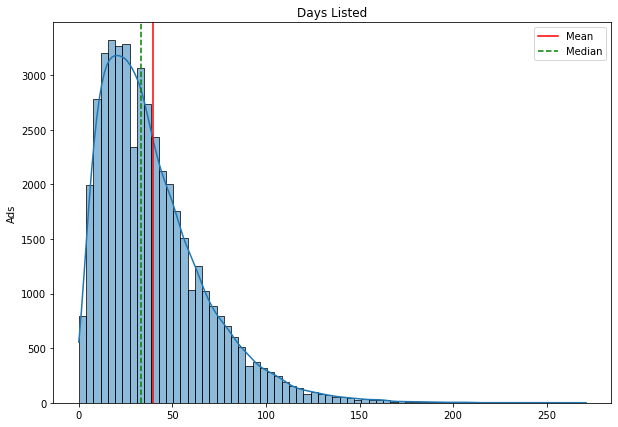

In [62]:
# Menampilkan histogram days_listed dengan mean dan median
mean=good_df['days_listed'].mean()
median=good_df['days_listed'].median()

plt.figure(figsize=(10,7))
ax_hist = sns.histplot(data=good_df, x='days_listed', bins=70, kde=True)
ax_hist.axvline(mean, color='r', linestyle='-', label='Mean')
ax_hist.axvline(median, color='g', linestyle='--', label='Median')
ax_hist.set(title='Days Listed', xlabel='', ylabel='Ads')
ax_hist.legend()
plt.show()

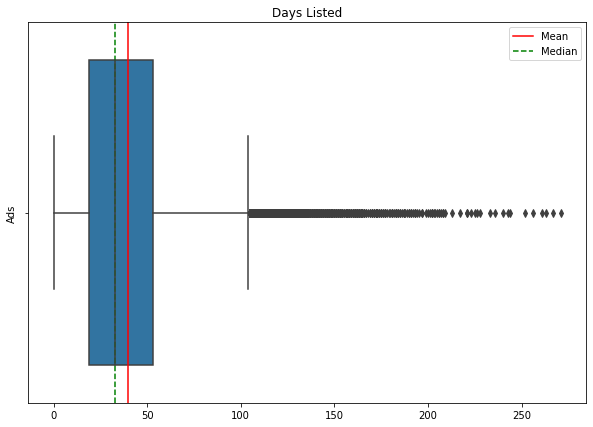

In [63]:
# Menampilkan boxplot days_listed dengan mean dan median
plt.figure(figsize=(10,7))
ax_box = sns.boxplot(data=good_df, x='days_listed')
ax_box.axvline(mean, color='r', linestyle='-', label='Mean')
ax_box.axvline(median, color='g', linestyle='--', label='Median')
ax_box.set(title='Days Listed', xlabel='', ylabel='Ads')
ax_box.legend()
plt.show()

Beberapa mobil di iklankan dalam waktu yang lama, rata-rata iklan diposting selama 33 hari dan 75% dibawah 53 hari.

### Filter days_listed

Kita akan memfilter data dari days listed agar tidak lebih dari 150 hari dan tidak kurang dari 1 hari.

In [64]:
# Memfilter data
too_fast = 1
too_long = 150

good_days_listed = good_df.query('@too_fast <= days_listed <= @too_long')

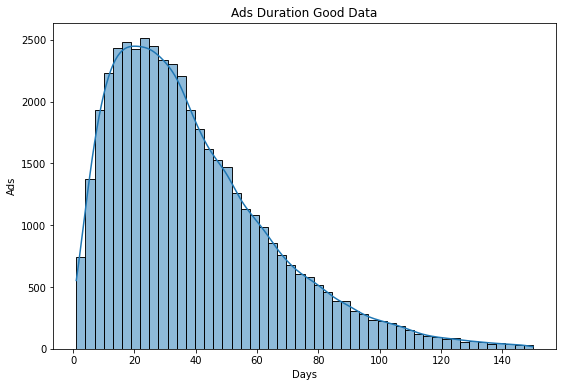

In [65]:
# Membuat diagram days_listed setelah difilter
plt.figure(figsize=(9,6))
sns.histplot(good_days_listed['days_listed'], bins=50, kde=True)
plt.xlabel('Days')
plt.ylabel('Ads')
plt.title('Ads Duration Good Data')
plt.show()

Terlihat distribusi data sudah lebih baik dari sebelumnya.

## Harga Rata-Rata Setiap Jenis Kendaraan

Melakukan explorasi untuk mengetahui kendaraan apa yang paling bergantung terhadapa iklan dan harga rata-rata dari tipe kendaraan paling popular.

### Jumlah masing-masing tipe

In [66]:
# Menampilkan jumlah masing-masing tipe
types_ads = good_df['type'].value_counts()
types_ads

sedan          11421
suv            11372
truck          10430
pickup          6168
coupe           1945
wagon           1475
mini-van        1090
hatchback        973
van              532
convertible      341
other            220
offroad          181
bus               21
Name: type, dtype: int64

Dua type mobil dengan jumlah iklan paling banyak yaitu, `suv` dan `sedan`.

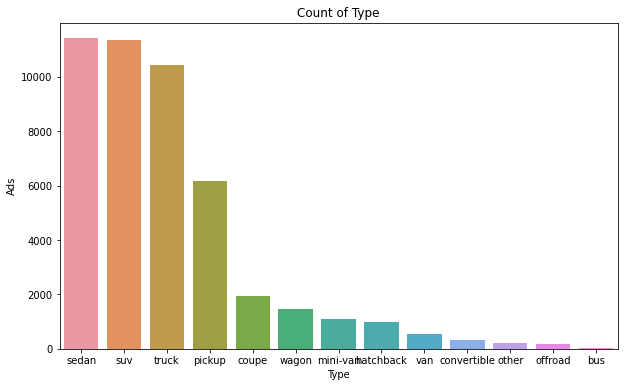

In [67]:
# Membuat diagram
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=good_df, order=good_df['type'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Ads')
plt.title('Count of Type')
plt.show()

### Harga rata-rata tipe kendaraan

In [68]:
# Menampilkan rata-rata harga setiap tipe kendaraan
type_pivot_table = good_df.pivot_table(index='type',
                                      values='price',
                                      aggfunc=['mean', 'median'], 
                                      ).reset_index()
type_pivot_table.sort_values(('median', 'price'), ascending=False)

,type,mean,median
,,price,price
0,bus,18441.047619,28990.0
10,truck,15068.615340,14490.0
2,coupe,13958.016452,13900.0
7,pickup,14620.285019,13495.0
1,convertible,13138.800587,12980.0
5,offroad,14160.314917,12500.0
6,other,10069.822727,8800.0
9,suv,10486.719223,8605.5
12,wagon,8835.538983,7745.0


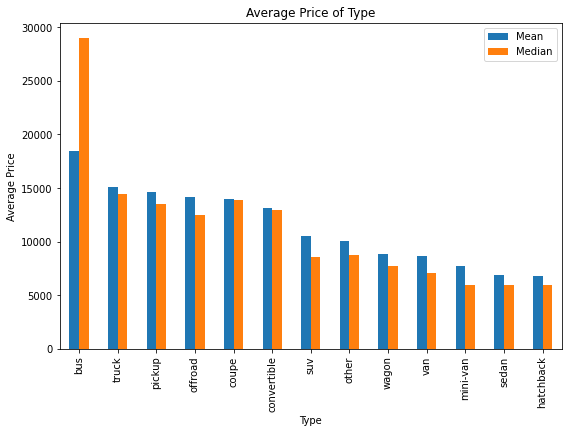

In [69]:
# Membuat barplot
type_pivot_table.sort_values(('mean', 'price'), ascending=False).plot(kind='bar', 
                                                                      figsize=(9, 6), 
                                                                      x='type', 
                                                                      y=['mean', 'median'], 
                                                                      label=['Mean','Median']
                                                                     )

plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price of Type')
plt.show()

Overview :
<br>1. Tipe bus, truck, dan pick-up memiliki rata-rata harga tertinggi artinya, mobil tipe angkutan umum dan angkutan masal memiliki average harga di atas mobil tipe lain.
<br>2. Mobil tipe offroad, coupe, convertible, suv, dan other, memiliki harga rata-rata dibawah tipe angkutan umum, artinya mobil dengan tipe sport memiliki haraga rata-rata tertinggi kedua.
<br>3. Tipe kendaran perkotaan yang berisi wagon, van, mini-van, sedan, dan hatchback memiliki harga rata-rata terendah dari jenis mobil lainnya.

### Kendaraan yang paling bergantung pada iklan

In [70]:
# Filter most two type
type_sedan = good_df.query('type == "sedan"')
type_suv = good_df.query('type == "suv"')

In [71]:
# Membuat fungsi masing-masing type
def hist_plot(ct, col, title):
    plt.figure(figsize=(9,6))
    sns.histplot(ct[col], bins=30, kde=True)
    plt.xlabel('Price')
    plt.ylabel('Ads')
    plt.title(title)
    plt.show()

In [72]:
# Statistik deskriptif type sedan
type_sedan['price'].describe()

count    11421.000000
mean      6888.302688
std       4144.124355
min         12.000000
25%       3995.000000
50%       5995.000000
75%       8995.000000
max      33390.000000
Name: price, dtype: float64

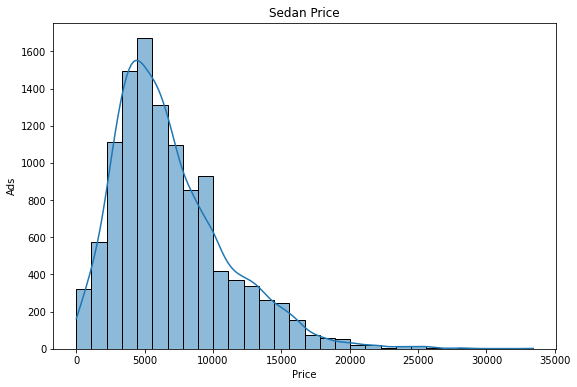

In [73]:
# Distribusi harga sedan
hist_plot(type_sedan, 'price', 'Sedan Price')

Rata-rata harga sedan dibawah \\$6000, 75% sedan berada pada harga di bawah \\$9000.

In [74]:
# Statistik deskriptif type suv
type_suv['price'].describe()

count    11372.000000
mean     10486.719223
std       6975.041924
min         35.000000
25%       5000.000000
50%       8605.500000
75%      14499.000000
max      34595.000000
Name: price, dtype: float64

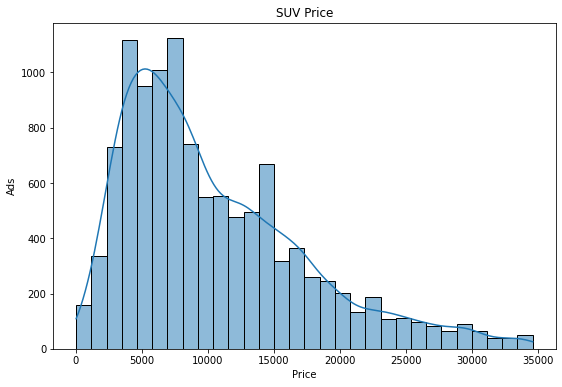

In [75]:
# Distribusi harga suv
hist_plot(type_suv, 'price', 'SUV Price')

Rata-rata harga SUV dibawah \\$9000, 75% sedan berada pada harga di bawah \\$14500.

## Faktor Harga

Mengeksplor data untuk mencari faktor-faktor yang dapat memengaruhi harga dari kendaraan dengan beberapa parameter seperti usia mobil, jarak tempuh, warna, tipe transmisi, dan kondisi, dengan menggunakan matrik korelasi dan scatterplot.

### Korelasi Harga Sedan dengan Variabel Numerik

In [76]:
# Menghitung jumlah masing-masing kategori dari sedan
for col in ['paint_color', 'transmission', 'condition']:
    print()
    print(type_sedan[col].value_counts())
    print()


unknown    2065
silver     1943
black      1651
grey       1544
white      1392
blue       1167
red         890
brown       255
custom      254
green       203
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64


automatic    10794
manual         561
other           66
Name: transmission, dtype: int64


3    5706
2    4119
4    1232
1     284
5      43
0      37
Name: condition, dtype: int64



In [77]:
# Menghapus kategori yang tidak valid dari sedan
good_type_sedan = type_sedan.query('condition != 0 and condition != 5')
good_type_sedan = good_type_sedan.query('paint_color != "purple" and paint_color != "yellow" and paint_color != "orange"')


Correlation between Price and vehicle_age : -0.6564930037098922


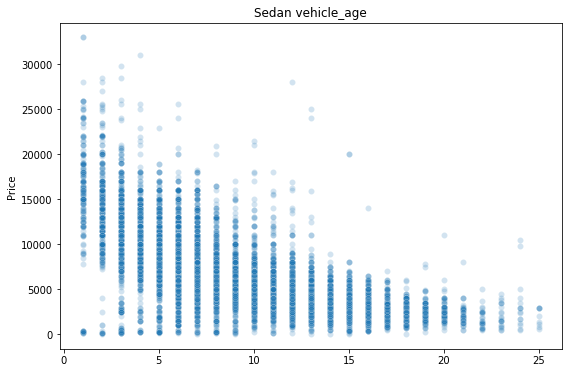



Correlation between Price and avg_distance : 0.08932174761424812


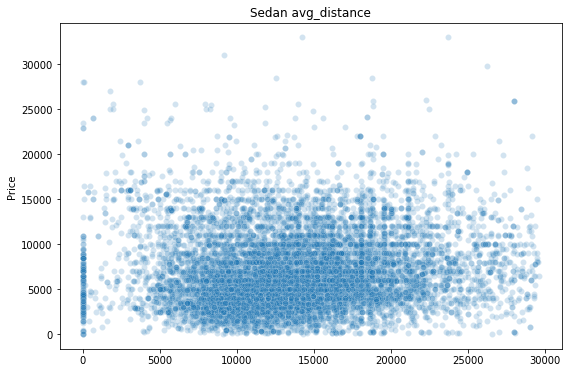



Correlation between Price and condition : 0.31082637273008074


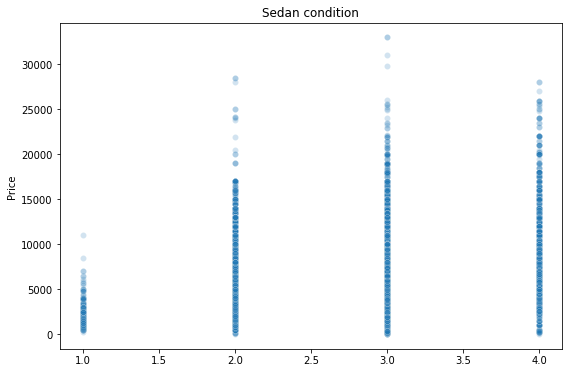

In [78]:
# Membuat fungsi scatterplot data numerikal dari sedan
num_variable = ['vehicle_age', 'avg_distance', 'condition']

for column in num_variable:
    print()
    print('Correlation between Price and', column, ':', good_type_sedan['price'].corr(good_type_sedan[column]))
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=good_type_sedan[column], y=good_type_sedan['price'], data=good_type_sedan, alpha=0.2)
    plt.xlabel('')
    plt.ylabel('Price')
    plt.title('Sedan ' + column)
    plt.show() 
    print()

Kita hampir melihat adanya korelasi negatif antara harga sedan dengan kolom usia, meskipun titik-titiknya tidak terlalu jelas, kita tidak melihat korelasi antara harga dan rata-rata jarak, kita bisa melihat tabel korelasi untuk mengetahui secara pasti angkanya.

In [79]:
# Menampilkan tabel korelasi data numerikal pada sedan
type_sedan_metric_num = good_type_sedan[['price', 'vehicle_age', 'avg_distance', 'condition']]
type_sedan_metric_num.corr()

,price,vehicle_age,avg_distance,condition
price,1.000000,-0.656493,0.089322,0.310826
vehicle_age,-0.656493,1.000000,-0.431632,-0.299832
avg_distance,0.089322,-0.431632,1.000000,-0.049152
condition,0.310826,-0.299832,-0.049152,1.000000


Kita melihat adanya koneksi negatif yang tidak terlalu kuat antara harga terhadap usia sebesar -0,65, artinya semakin tinggi usia dan odometer maka akan semakin rendah harga suatu mobil.

Kita juga bisa melihat korelasi yang sangat lemah antara harga dengan rata-rata jarak sebesar 0.08.

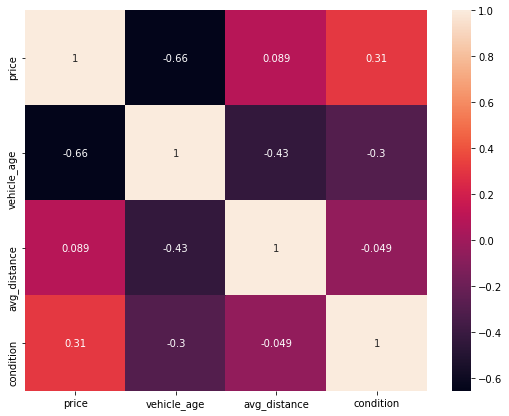

In [80]:
# Menampilkan heatmap korelasi data ta pada sedan
plt.figure(figsize=(9,7))
sns.heatmap(type_sedan_metric_num.corr(), annot=True)
plt.show()

Kita juga mengetahui nilai koneksi yang kecil antara harga mobil terhadap kondisi dengan angka 0.31.

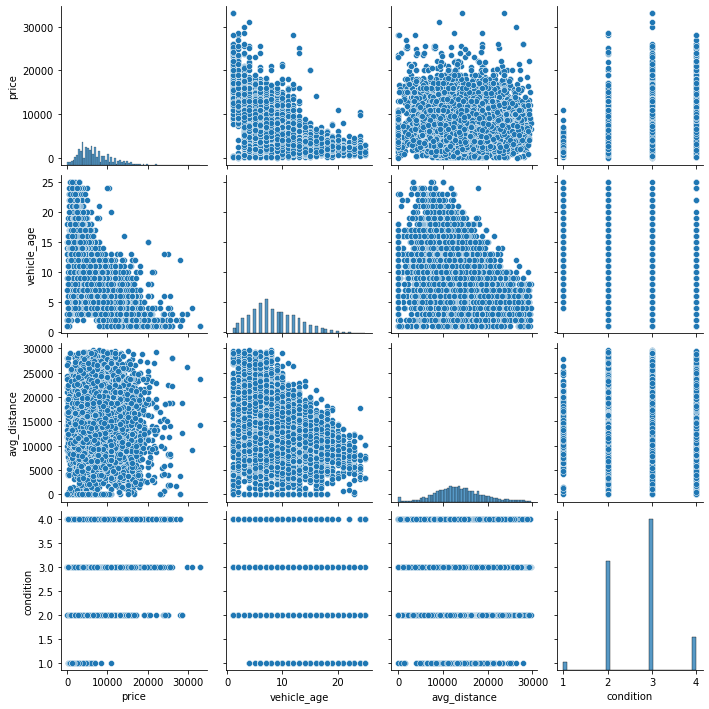

In [81]:
# Menampilkan diagram korelasi data kategorikal pada sedan
sns.pairplot(type_sedan_metric_num)
plt.show()

Kita bisa melihat persebaran dari data numerikal.

### Korelasi Harga Sedan dengan Variabel Kategorik

In [82]:
# Membuat kolom baru untuk data kategorikal menjadi integer
good_type_sedan['paint_color_num'] = good_type_sedan['paint_color'].astype('category').cat.codes
good_type_sedan['transmission_num'] = good_type_sedan['transmission'].astype('category').cat.codes

In [83]:
# Menampilkan sampel data dari sedan
good_type_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance,paint_color_num,transmission_num
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.0,6,0
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26968.0,0,0
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,5,11591.0,0,0
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,12,2018,4,19803.0,9,0
11,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,3,3,2019,8,13893.0,5,0


In [84]:
# Membuat fungsi boxplot data kategorikal pada sedan dan suv
def box_plot(data, num, col, title):
    print('Correlation between Price and', num, ':', data['price'].corr(data[num]))
    plt.figure(figsize=(9,6))
    sns.boxplot(x=col, y='price', data=data, showfliers = False)
    plt.xlabel('')
    plt.ylabel('Price')
    plt.title(title)
    plt.show() 
    print()

Correlation between Price and paint_color_num : 0.005270568142143551


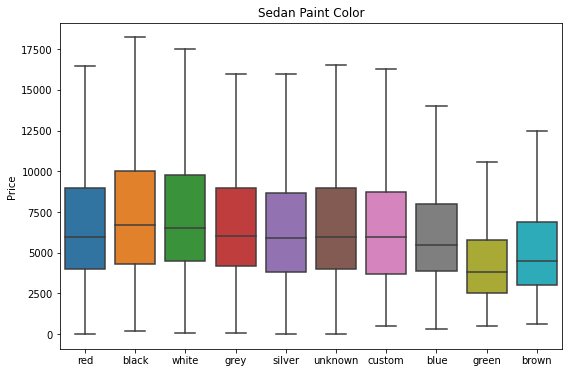

In [85]:
# Menampilkan boxplot kolom warna pada sedan
box_plot(good_type_sedan, 'paint_color_num', 'paint_color', 'Sedan Paint Color' )

Kita mengetahui bahwa mobil dengan warna hitam dan putih akan memiliki harga jual lebih tinggi dari warna lainnya, dengan warna hijau harga jual paling rendah, artinya kebanyakan konsumen lebih menyukai kendaraan dengan warna netral dibandingkan dengan warna yang terlihat mencolok.

Correlation between Price and transmission_num : -0.060711151371017284


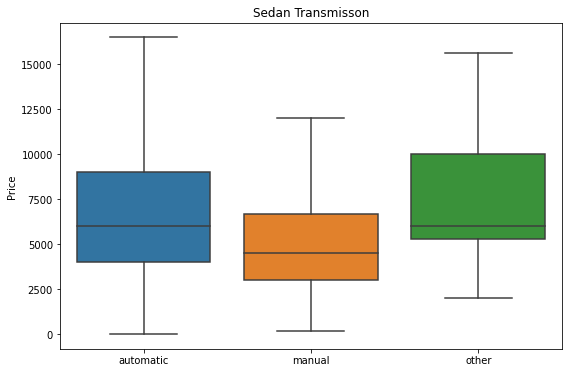

In [86]:
# Menampilkan boxplot kolom transmisi pada sedan
box_plot(good_type_sedan, 'transmission_num', 'transmission', 'Sedan Transmisson')

Mobil matic memiliki harga yang lebih tinggi dari mobil manual.

In [87]:
# Menampilkan tabel korelasi data kategorikal pada sedan
type_sedan_metric_cat = good_type_sedan[['price', 'paint_color_num', 'transmission_num']]
type_sedan_metric_cat.corr()

,price,paint_color_num,transmission_num
price,1.000000,0.005271,-0.060711
paint_color_num,0.005271,1.000000,-0.002713
transmission_num,-0.060711,-0.002713,1.000000


Kita melihat tidak adanya koneksi harga terhadap warna dan transisi, mungkin jika warna dan transmisi kita bagi kedalam kelompok-kelompok kita akan menemukan sebuah korelasi.

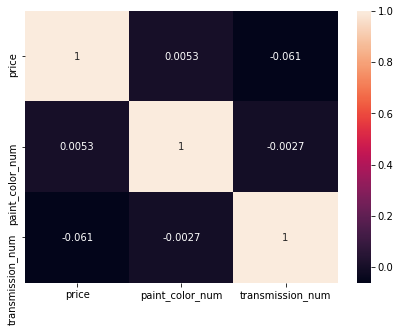

In [88]:
# Menampilkan heatmap korelasi data kategorikal pada sedan
plt.figure(figsize=(7,5))
sns.heatmap(type_sedan_metric_cat.corr(), annot=True)
plt.show()

### Korelasi Harga Sedan dengan  semua Variabel 

In [89]:
# Menampilkan tabel korelasi semua data pada sedan
corr_sedan = good_type_sedan[['price','vehicle_age', 'avg_distance', 'condition', 'paint_color_num', 'transmission_num']]
corr_sedan.corr()

,price,vehicle_age,avg_distance,condition,paint_color_num,transmission_num
price,1.000000,-0.656493,0.089322,0.310826,0.005271,-0.060711
vehicle_age,-0.656493,1.000000,-0.431632,-0.299832,0.007389,0.075081
avg_distance,0.089322,-0.431632,1.000000,-0.049152,0.004320,-0.009212
condition,0.310826,-0.299832,-0.049152,1.000000,0.025570,-0.042047
paint_color_num,0.005271,0.007389,0.004320,0.025570,1.000000,-0.002713
transmission_num,-0.060711,0.075081,-0.009212,-0.042047,-0.002713,1.000000


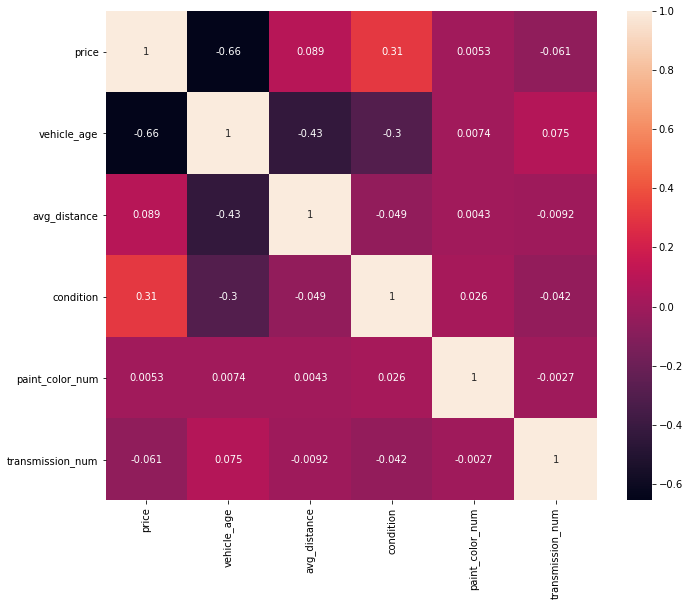

In [90]:
# Menampilkan tabel korelasi seluruh data pada sedan
plt.figure(figsize=(11,9))
sns.heatmap(corr_sedan.corr(), annot=True)
plt.show()

### Korelasi Harga SUV dengan Variabel Numerik

In [91]:
# Menghitung jumlah masing-masing kategori pada suv
for col in ['paint_color', 'transmission', 'condition']:
    print()
    print(type_suv[col].value_counts())
    print()


unknown    2046
black      1988
white      1776
silver     1450
grey       1093
blue        958
red         856
green       423
brown       353
custom      270
orange       78
yellow       42
purple       39
Name: paint_color, dtype: int64


automatic    10816
manual         464
other           92
Name: transmission, dtype: int64


3    5900
2    4099
4    1035
1     305
0      18
5      15
Name: condition, dtype: int64



In [92]:
# Menghapus kategori yang tidak valid pada suv
good_type_suv = type_suv.query('condition != 0 and condition != 5')
good_type_suv = good_type_suv.query('paint_color != "purple" and paint_color != "yellow"')


Correlation between Price and vehicle_age : -0.6408057499494885


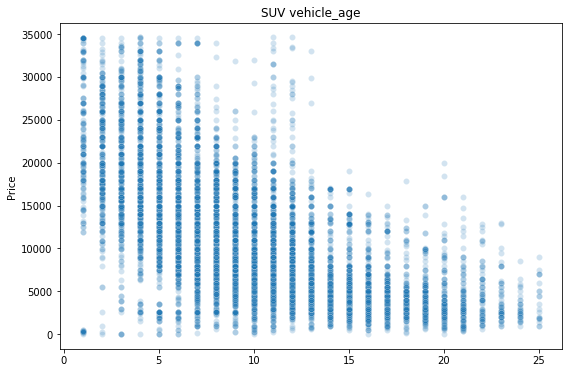



Correlation between Price and avg_distance : 0.16772448742928955


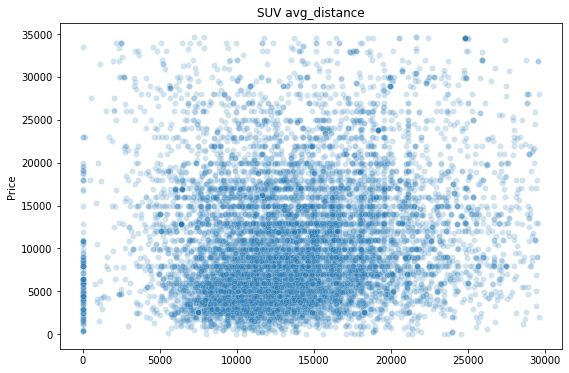



Correlation between Price and condition : 0.29149921347163166


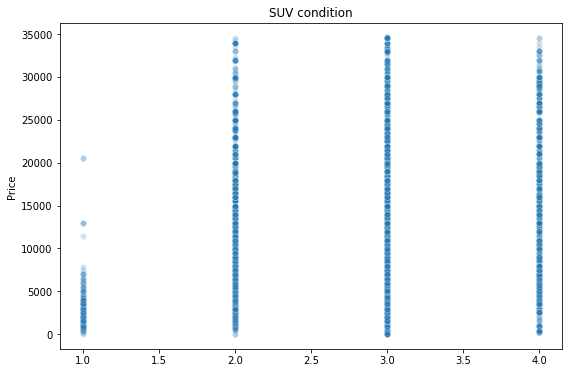

In [93]:
# Membuat fungsi scatterplot pada suv
for column in num_variable:
    print()
    print('Correlation between Price and', column, ':', good_type_suv['price'].corr(good_type_suv[column]))
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=good_type_suv[column], y=good_type_suv['price'], data=good_type_suv, alpha=0.2)
    plt.xlabel('')
    plt.ylabel('Price')
    plt.title('SUV ' + column)
    plt.show() 
    print()

Kita juga hampir melihat adanya korelasi negatif antara harga suv dengan kolom usia, meskipun titik-titiknya tidak terlalu jelas kita tidak melihat korelasi harga dengan rata-rata jarak, kita bisa melihat tabel korelasi untuk mengetahui lebih detail.

In [94]:
# Menampilkan tabel korelasi data numerikal pada suv
type_suv_metric_num = good_type_suv[['price', 'vehicle_age', 'avg_distance', 'condition']]
type_suv_metric_num.corr()

,price,vehicle_age,avg_distance,condition
price,1.000000,-0.640806,0.167724,0.291499
vehicle_age,-0.640806,1.000000,-0.502707,-0.316300
avg_distance,0.167724,-0.502707,1.000000,0.000187
condition,0.291499,-0.316300,0.000187,1.000000


Kita bisa melihat adanya koneksi negatif yang tidak terlalu kuat antara harga suv terhadap usia sebesar -0,64  artinya semakin tinggi usia maka akan semakin rendah harga suatu mobil.

Kita tidak menemukan korelasi antara harga dan rata-rata-jarak hanya 0.16.

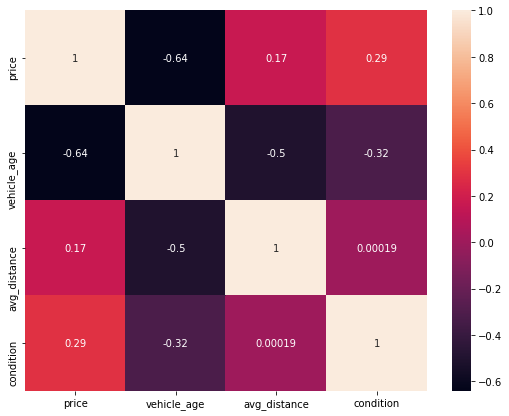

In [95]:
# Menampilkan heatmap korelasi data numerikal pada suv
plt.figure(figsize=(9,7))
sns.heatmap(type_suv_metric_num.corr(), annot=True)
plt.show()

Sama seperti sedan, kita juga mengetahui hampir tidak ada koneksi antara harga mobil terhadap kondisi dengan angka 0.29.

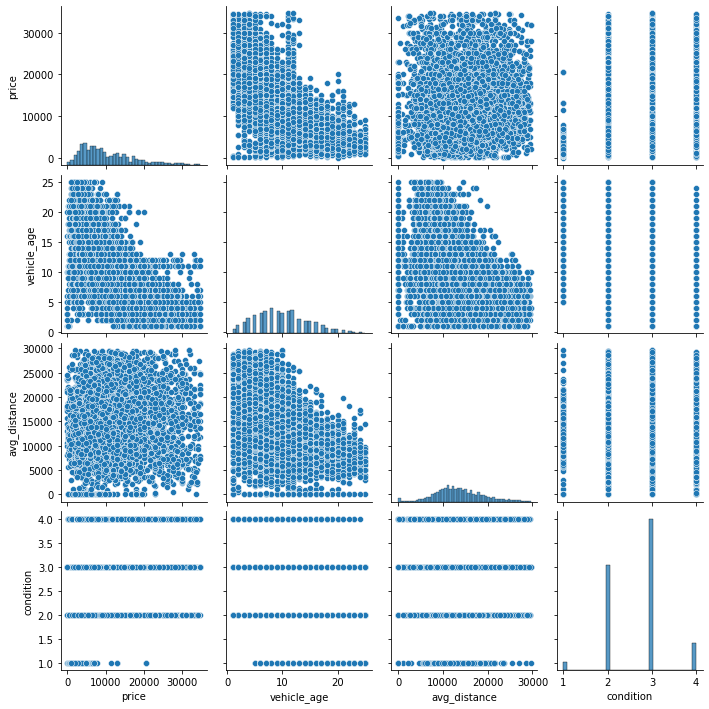

In [96]:
# Menampilkan diagram korelasi data numerikal pada suv
sns.pairplot(type_suv_metric_num)
plt.show()

Distribusi variabel numerikal terhadap harga suv.

### Korelasi Harga SUV dengan Variabel Kategorik

In [97]:
# Membuat kolom baru untuk kategori suv menjadi integer
good_type_suv['paint_color_num'] = good_type_suv['paint_color'].astype('category').cat.codes
good_type_suv['transmission_num'] = good_type_suv['transmission'].astype('category').cat.codes

In [98]:
# Menampilkan sampel data tipe suv
good_type_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek_posted,month_posted,year_posted,vehicle_age,avg_distance,paint_color_num,transmission_num
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,5,6,2018,8,18125.0,9,0
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,suv,black,True,2019-01-07,68,0,1,2019,7,15639.0,0,0
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,suv,unknown,True,2018-07-16,19,0,7,2018,7,14882.0,9,0
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,4,2,2019,12,12266.0,1,0
14,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,suv,black,True,2019-01-31,24,3,1,2019,11,12026.0,0,0


Correlation between Price and paint_color_num : 0.005270568142143551


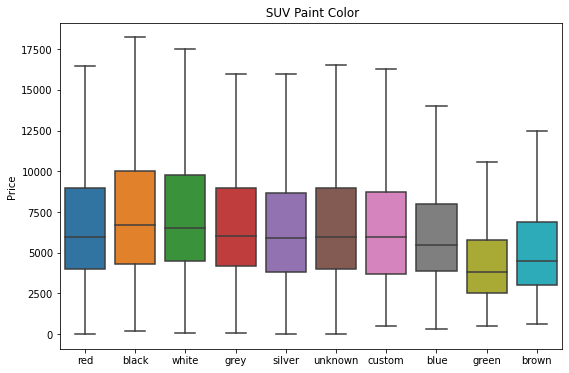

In [99]:
# Menampilkan boxplot kolom warna dari suv
box_plot(good_type_sedan, 'paint_color_num', 'paint_color', ' SUV Paint Color')

Kita juga melihat warna mobil warna hitam dan putih lebih disukai konsumen dari warna lain.

Correlation between Price and transmission_num : 0.04323297117790894


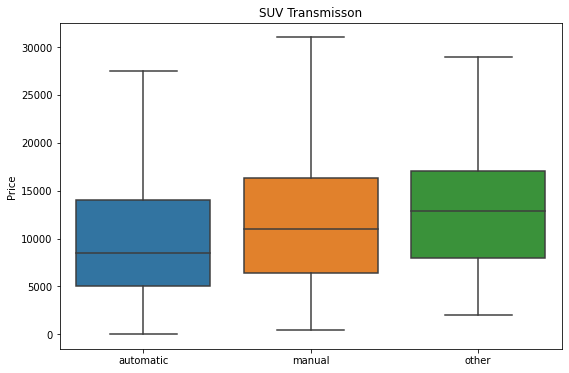

In [100]:
# Menampilkan boxplot kolom warna dari transmisi
box_plot(good_type_suv, 'transmission_num', 'transmission', 'SUV Transmisson')

Menarik disini bahwa mobil suv dengan tipe manual memiliki harga yang lebih tinggi dari versi matic.

In [101]:
# Menampilkan tabel korelasi data kategorikal pada suv
type_suv_metric_cat = good_type_suv[['price', 'paint_color_num', 'transmission_num']]
type_suv_metric_cat.corr()

,price,paint_color_num,transmission_num
price,1.000000,-0.006556,0.043233
paint_color_num,-0.006556,1.000000,-0.010162
transmission_num,0.043233,-0.010162,1.000000


Tidak ada korelasi antara harga suv dengan warna dan transmisi.

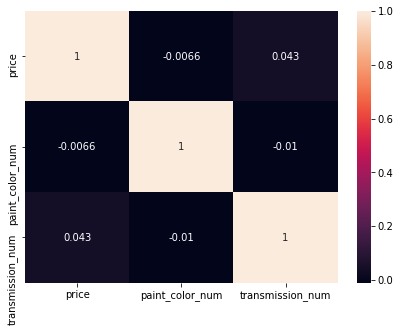

In [102]:
# Menampilkan heatmap korelasi data kategori pada suv
plt.figure(figsize=(7,5))
sns.heatmap(type_suv_metric_cat.corr(), annot=True)
plt.show()

### Korelasi Harga SUV dengan  semua Variabel 

In [103]:
# Menampilkan tabel korelasi terhadap harga suv
corr_suv = good_type_suv[['price','vehicle_age', 'avg_distance', 'condition', 'paint_color_num', 'transmission_num']]
corr_suv.corr()

,price,vehicle_age,avg_distance,condition,paint_color_num,transmission_num
price,1.000000,-0.640806,0.167724,0.291499,-0.006556,0.043233
vehicle_age,-0.640806,1.000000,-0.502707,-0.316300,-0.001270,0.095182
avg_distance,0.167724,-0.502707,1.000000,0.000187,-0.003485,-0.091336
condition,0.291499,-0.316300,0.000187,1.000000,0.020125,-0.010329
paint_color_num,-0.006556,-0.001270,-0.003485,0.020125,1.000000,-0.010162
transmission_num,0.043233,0.095182,-0.091336,-0.010329,-0.010162,1.000000


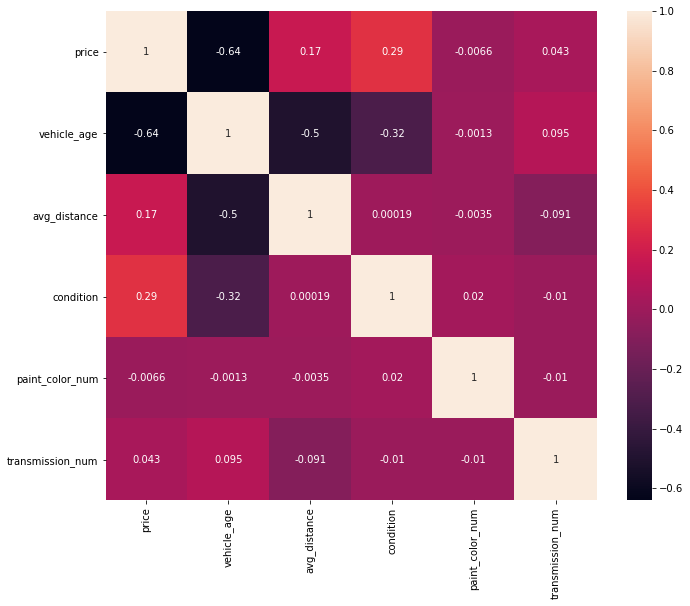

In [104]:
# Menampilkan heatmap korealsi dari harga suv
plt.figure(figsize=(11,9))
sns.heatmap(corr_suv.corr(), annot=True)
plt.show()

Heatmap dari semua variabel terhdap harga suv.

## Kesimpulan Umum

Kita telah melakukan beberapa tahap dalam memproses data mobil untuk mendapatkan kesimpulan.

**A. Tahap Praproses**

Dari eksplorasi yang kita lakukan kita mendapatkan beberapa konsklusi:
<br>1. Kita memulai dengan ukuran dataset sebanyak **51525** baris dan **13** kolom, ada 5 kolom yang terdapat *missing value* yaitu model_year, cylinders, odometer, paint_color, dan is_4wd.
<br>2. Langkah-langkah yang kita lakukan berikutnya adalah mengisi nilai dari kolom-kolom yang terdapat *missing value*, memperbaiki tipe data, memperbaiki kualitas data, dan menambahkan beberapa kolom.

Penyebab nilai yang hilang, bisa diakibatkan karena *human error* atau memang tidak memiliki akses data yang cukup dengan kendaraan tersebut megingat beberapa kendaraan memiliki usia yang sangat tua bisa lebih dari seratus tahun

**B. Tahap Esksplorasi**

Setelah tahap prapemrosesan data kita melakukan beberapa ekplorasi:
<br>1. Menetapkan batas *outliers* dari kolom harga, usia, dan odometer, dan membuat dataset baru dengan jumlah baris sebanyak **46169**.
<br>2. Kita juga memfilter untuk mendapatkan waktu iklan dengan rentang **1 - 150 hari**.
<br>3. Kita mendapati bahwa tipe mobil yang paling populer adalah sedan dan SUV.

**C. Konsklusi**

Dari eksplorasi yang kita lakukan kita mendapatkan beberapa konsklusi:
<br>1. Harga mobil terhadap usia memiliki koneksi negatif meskipun nilainya tidak terlalu tinggi, artinya mobil yang lebih baru akan memiliki harga yang lebih tinggi.
<br>2. Harga mobil dan rata-rata jarak memiliki korelasi yang sangat lemah.
<br>3. Harga dan kondisi menunjukan korelasi yang rendah.
<br>4. Mobil dengan warna hitam dan putih memiliki harga yang lebih tinggi dari warna lainnya.
<br>5. Sedangkan tipe transmisi tidak selalu menunjukan bahwa mobil matic akan lebih mahal dari mobil manual.